# **Implementing MLPs with Keras**

# **1st Run**
*   **Layers:** Three hidden layers.
*   **Number of Neurons:** 50 neurons in each hidden layer.
*   **Activation Function:** Rectified Linear Unit (ReLU) activation function for each hidden layer. No activation function for the output layer (typical for regression tasks).
*   **Optimizer:** Adam optimizer.
*   **Learning Rate:** Learning rate is set to 0.001 for the Adam optimizer.

**Result**
*   **RMSE:** 0.603582021527494



In [9]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Set seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Load the California housing dataset
housing = fetch_california_housing()

# Split the dataset into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

# Further split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Create a Keras Sequential model
model = Sequential([
    Dense(50, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model on the training data
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), verbose=1)

# Make predictions on the validation set
y_pred = model.predict(X_valid_scaled).flatten()

# Calculate the Root Mean Squared Error (RMSE) between the predicted and actual values
rmse = mean_squared_error(y_valid, y_pred, squared=False)

# Display the RMSE as the result
print("RMSE:", rmse)


Epoch 1/50
363/363 [==============================] - 7s 9ms/step - loss: 0.7791 - val_loss: 0.3810
Epoch 2/50
363/363 [==============================] - 3s 9ms/step - loss: 0.3763 - val_loss: 0.6097
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3722 - val_loss: 0.3472
Epoch 4/50
363/363 [==============================] - 1s 4ms/step - loss: 0.3406 - val_loss: 0.4281
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3326 - val_loss: 0.6391
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3231 - val_loss: 0.4514
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3134 - val_loss: 0.5428
Epoch 8/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3063 - val_loss: 2.0429
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3071 - val_loss: 1.4031
Epoch 10/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3087 - val_loss: 0.3141

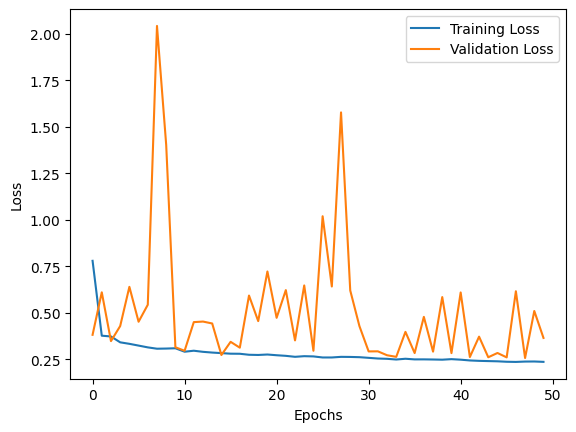

In [10]:
# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Display the loss values over epochs
import matplotlib.pyplot as plt

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **2nd Run**
*   **Layers:** Three hidden layers.
*   **Number of Neurons:** 100 neurons in each hidden layer.
*   **Activation Function:** Rectified Linear Unit (ReLU) activation function for each hidden layer. No activation function for the output layer (typical for regression tasks).
*   **Optimizer:** SGD optimizer.
*   **Learning Rate:** Learning rate is set to 0.01 for the SGD optimizer.

**Result**
*   **RMSE:** 0.5404654074121669


In [11]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Set seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Load the California housing dataset
housing = fetch_california_housing()

# Split the dataset into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

# Further split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Create a Keras Sequential model
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

# Train the model on the training data
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), verbose=1)

# Make predictions on the validation set
y_pred = model.predict(X_valid_scaled).flatten()

# Calculate the Root Mean Squared Error (RMSE) between the predicted and actual values
rmse = mean_squared_error(y_valid, y_pred, squared=False)

# Display the RMSE as the result
print("RMSE:", rmse)


Epoch 1/50
363/363 [==============================] - 1s 3ms/step - loss: 0.7106 - val_loss: 1.5436
Epoch 2/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4105 - val_loss: 1.6096
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3896 - val_loss: 0.3399
Epoch 4/50
363/363 [==============================] - 1s 4ms/step - loss: 0.3583 - val_loss: 0.3629
Epoch 5/50
363/363 [==============================] - 1s 4ms/step - loss: 0.3493 - val_loss: 0.3282
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3400 - val_loss: 0.3608
Epoch 7/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3359 - val_loss: 0.3134
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3274 - val_loss: 0.3617
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3215 - val_loss: 0.3507
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3176 - val_loss: 0.5658

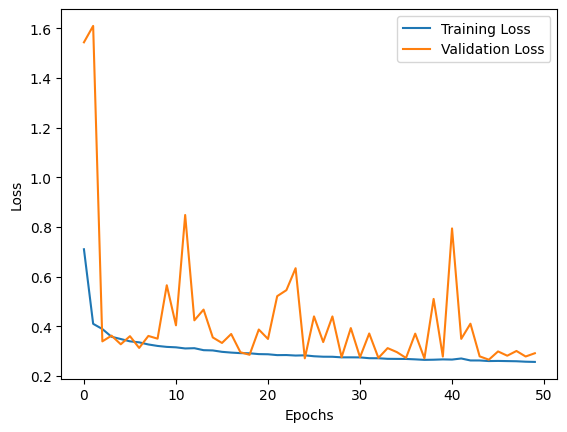

In [12]:
# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Display the loss values over epochs
import matplotlib.pyplot as plt

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()